## Dog Breed prediction
In this project we will use Keras and TensorFlow to build, train, and test a Convolutional Neural Network capable of indentifiying the breed of a dog in a supplied image

### Connect our colab into kaggles and load our datasets

In [ ]:
# Content our kaggel account into colab
from google.colab import files
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"rakibabente","key":"2f0f55faea3bf4bb30478b4d4236478f"}'}

### Install the kaggle API

In [ ]:
# Install the Kaggle API
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle(1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

## Creating  directory for my data

In [ ]:
# creating directory and changing the curent working directory
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [ ]:
# Searching for dataset
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                         size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  ----------  --------------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp   724495926  2020-06-26 03:09:05.433000           8348         10  0.1764706        


### Searching for dataset

In [ ]:
# Downloading dataset and coming out directory
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..


Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp
License(s): unknown
 91% 632M/691M [00:00<00:00, 2.98GB/s]
100% 691M/691M [00:00<00:00, 2.86GB/s]
/content


In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

### Import our necessary tools

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models, losses, optimizers

In [ ]:
## Read the labels and check the shapes
labels_all = pd.read_csv('dog_dataset/labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
 # Visualize the number of breeds
 breeds_all = labels_all['breed']
 breeds_counts = breeds_all.value_counts()
 breeds_counts.head()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


In [ ]:
# Check the lenght of the breed
len(breeds_counts)

120

In [ ]:
# check all the label
labels_all

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
#Check the unique breed
#labels_all["breed"].unique()

In [ ]:
CLASS_NAMES = np.array(labels_all["breed"].unique())
CLASS_NAMES

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [ ]:
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import  load_img, img_to_array
from tqdm import tqdm
# creating numpy matrix with zero
X_data = np.zeros((len(labels_all), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels_all['breed'], classes=CLASS_NAMES)
# reading  and converting image to numpy rray and Normalize dataset
for i in tqdm(range(len(labels_all))):
  img = load_img("dog_dataset/train/%s.jpg" % labels_all['id'][i], target_size=(224, 224))
  img_array = img_to_array(img)
  img_array = img_array/255.0
  X_data[i] = img_array

# Printing train image and one hot encode shape & size
print('\nTrain Image shape: ', X_data.shape, 'Size: {:,}'.format(X_data.size))
print('One-hot Encode shape: ', Y_data.shape, 'Size: {:,}'.format(Y_data.size))

100%|██████████| 10222/10222 [00:13<00:00, 770.19it/s]


Train Image shape:  (10222, 224, 224, 3) Size: 1,538,697,216
One-hot Encode shape:  (10222, 120) Size: 1,226,640


In [ ]:

# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Sequential

# # Build the model
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(len(CLASS_NAMES), activation='softmax'))

# model.compile(optimizer=Adam(1e-4),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.summary()



In [ ]:
# splitting our data into train and test data
from sklearn.model_selection import train_test_split
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)
# splitting the traning data set into train and valid sets
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size=0.2, random_state=42)

## Train my model from sratch and save it in
"/content/drive/MyDrive/dog_breed_model.keras"

In [ ]:
# # training the model
# # Mount Google Drive (only once)
# from google.colab import drive
# drive.mount('/content/drive')

# # ========== SAVE BEST MODEL CHECKPOINT ==========
# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint_path = "/content/drive/MyDrive/dog_breed_model.keras"

# checkpoint_cb = ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_best_only=True,
#     monitor="val_accuracy",
#     mode="max",
#     verbose=1
# )

# # ========== TRAINING WITH TOTAL TIME ==========
# import time

# start_time = time.time()

# history = model.fit(
#     X_train, y_train,
#     epochs=100,
#     batch_size=32,
#     validation_data=(X_val, y_val),
#     callbacks=[checkpoint_cb]
# )

# end_time = time.time()

# print(f"\nTotal training time: {end_time - start_time:.2f} seconds")
# print(f"Total training time: {(end_time - start_time)/60:.2f} minutes")
# print(f"Total training time: {(end_time - start_time)/3600:.2f} hours")

# # ========== SAVE FINAL MODEL ==========
# model.save(checkpoint_path)
# print("\nModel saved to:", checkpoint_path)


In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model("/content/drive/MyDrive/dog_breed_model.keras")

## My first model overfit .Now train my second model and save it in
"/content/drive/MyDrive/dog_breed_model_scratch.keras"



In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import (Input, Conv2D, MaxPool2D,
#                                      GlobalAveragePooling2D, Dense,
#                                      Dropout, RandomFlip, RandomRotation,
#                                      RandomZoom)
# from tensorflow.keras import regularizers
# from tensorflow.keras.optimizers import Adam

# num_classes = len(CLASS_NAMES)

# # Data augmentation block
# data_augmentation = Sequential([
#     RandomFlip("horizontal"),
#     RandomRotation(0.1),
#     RandomZoom(0.1),
# ])

# # New, smaller CNN with regularization
# model = Sequential([
#     Input(shape=(224, 224, 3)),
#     data_augmentation,                          # (2) augmentation

#     # Block 1
#     Conv2D(32, (3,3), activation='relu'),
#     Conv2D(32, (3,3), activation='relu'),
#     MaxPool2D((2,2)),

#     # Block 2
#     Conv2D(64, (3,3), activation='relu'),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPool2D((2,2)),

#     # Block 3
#     Conv2D(128, (3,3), activation='relu'),
#     MaxPool2D((2,2)),

#     # Instead of Flatten → GAP (fewer params)
#     GlobalAveragePooling2D(),

#     Dense(256, activation='relu',
#           kernel_regularizer=regularizers.l2(1e-4)),
#     Dropout(0.5),

#     Dense(num_classes, activation='softmax')
# ])

# model.compile(
#     optimizer=Adam(1e-4),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()


In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# import time

# checkpoint_path = "/content/drive/MyDrive/dog_breed_model_scratch.keras"

# checkpoint_cb = ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_best_only=True,
#     monitor="val_accuracy",
#     mode="max",
#     verbose=1
# )

# early_stop_cb = EarlyStopping(
#     monitor="val_accuracy",
#     patience=5,              # stop if no improvement for 5 epochs
#     restore_best_weights=True,
#     verbose=1
# )

# start_time = time.time()

# history = model.fit(
#     X_train, y_train,
#     epochs=40,               # (3) fewer epochs; early stopping usually stops earlier
#     batch_size=32,
#     validation_data=(X_val, y_val),
#     callbacks=[checkpoint_cb, early_stop_cb]
# )

# end_time = time.time()
# print(f"\nTotal training time: {(end_time - start_time)/60:.2f} minutes")

# model.save(checkpoint_path)
# print("Model saved to:", checkpoint_path)


### My second Model didn't learn at all so I will use a pretrained model and save the model in
"/content/drive/MyDrive/dog_breed_model_tl.keras"

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# import time

# checkpoint_path = "/content/drive/MyDrive/dog_breed_model_tl.keras"

# checkpoint_cb = ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_best_only=True,
#     monitor="val_accuracy",
#     mode="max",
#     verbose=1
# )

# early_cb = EarlyStopping(
#     monitor="val_accuracy",
#     patience=5,
#     restore_best_weights=True,
#     verbose=1
# )


In [ ]:
# start = time.time()

# history = model.fit(
#     X_train, y_train,
#     batch_size=32,
#     epochs=20,
#     validation_data=(X_val, y_val),
#     callbacks=[checkpoint_cb, early_cb]
# )

# end = time.time()
# print(f"Training time (minutes): {(end - start)/60:.2f}")

# model.save(checkpoint_path)
# print("Model saved:", checkpoint_path)


In [ ]:
# # ====== 4. Fine-Tuning Preparation ======

# # Load best model from Phase 1
# from tensorflow.keras.models import load_model
# model = load_model(checkpoint_path)

# # Unfreeze the base model for fine-tuning
# base.trainable = True

# # Freeze the first 100 layers (keeps stable low-level features)
# for layer in base.layers[:100]:
#     layer.trainable = False

# # Recompile with very small learning rate
# model.compile(
#     optimizer=Adam(1e-5),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )

# # ====== 5. Fine-Tuning TRAIN ======
# history_ft = model.fit(
#     X_train, y_train,
#     epochs=20,
#     batch_size=32,
#     validation_data=(X_val, y_val),
#     callbacks=[checkpoint_cb, early_cb]
# )

# print("Fine-tuning complete.")
# print("Best fine-tuned model saved to:", checkpoint_path)


### Now lets load the model and make prediction on test data

In [ ]:
 # Load the data
 from tensorflow.keras.models import load_model

 model = load_model("/content/drive/MyDrive/dog_breed_model_tl.keras")

In [ ]:
# Make prediction
preds = model.predict(X_test)               # raw probabilities
pred_classes = np.argmax(preds, axis=1)     # best class index


64/64 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step


In [ ]:
pred_breeds = [CLASS_NAMES[idx] for idx in pred_classes]


In [ ]:
pred_breeds[0]

'toy_terrier'

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


64/64 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.7229 - loss: 0.9255
Test Accuracy: 0.7276283502578735
Test Loss: 0.9276851415634155


In [ ]:
# Check the first 10 predicted class name
first_10_preds = pred_classes[:10]

for i, p in enumerate(first_10_preds):
    print(f"Image {i}: Predicted → {CLASS_NAMES[p]}")


Image 0: Predicted → toy_terrier
Image 1: Predicted → irish_setter
Image 2: Predicted → scottish_deerhound
Image 3: Predicted → english_setter
Image 4: Predicted → samoyed
Image 5: Predicted → bluetick
Image 6: Predicted → soft-coated_wheaten_terrier
Image 7: Predicted → welsh_springer_spaniel
Image 8: Predicted → boston_bull
Image 9: Predicted → pembroke


In [ ]:
# Compare the first 10 predicted class name with the true class name
for i in range(10):
    pred_label = CLASS_NAMES[pred_classes[i]]
    true_label = CLASS_NAMES[np.argmax(y_test[i])]
    print(f"Image {i}: Pred = {pred_label} | True = {true_label}")


Image 0: Pred = toy_terrier | True = toy_terrier
Image 1: Pred = irish_setter | True = irish_setter
Image 2: Pred = scottish_deerhound | True = scottish_deerhound
Image 3: Pred = english_setter | True = english_setter
Image 4: Pred = samoyed | True = great_pyrenees
Image 5: Pred = bluetick | True = german_short-haired_pointer
Image 6: Pred = soft-coated_wheaten_terrier | True = soft-coated_wheaten_terrier
Image 7: Pred = welsh_springer_spaniel | True = welsh_springer_spaniel
Image 8: Pred = boston_bull | True = boston_bull
Image 9: Pred = pembroke | True = chihuahua


### Plot the predicted  and the truth value to see the diferrence

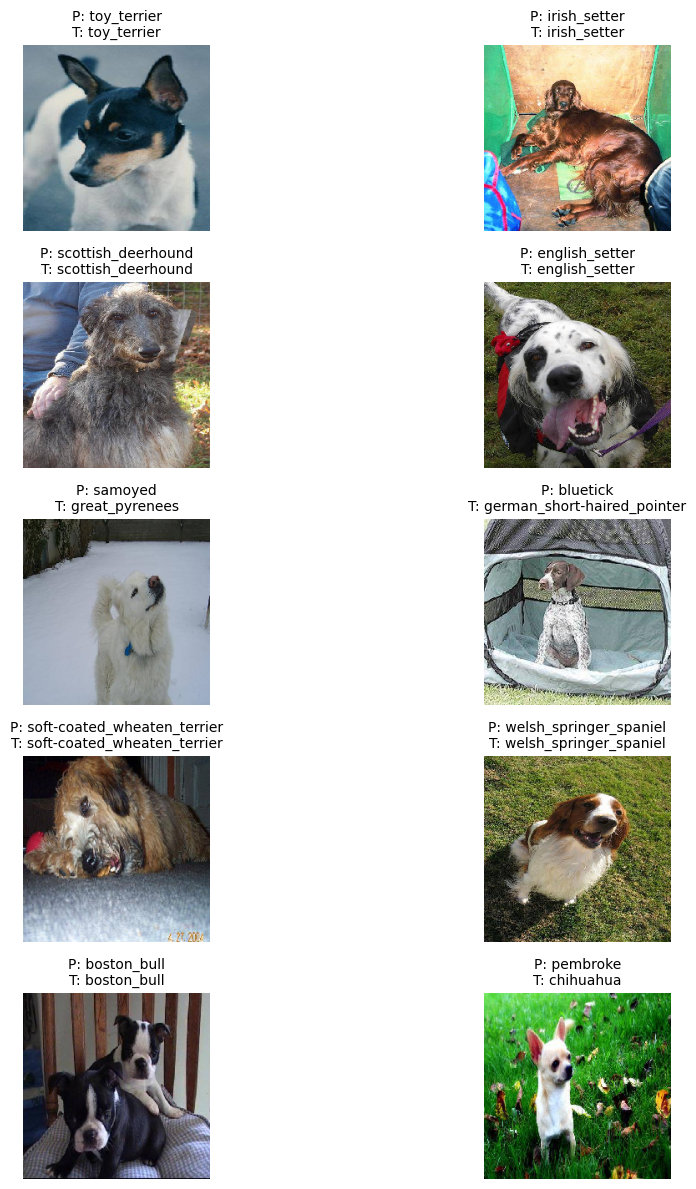

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')

    pred_label = CLASS_NAMES[pred_classes[i]]
    true_label = CLASS_NAMES[np.argmax(y_test[i])]

    plt.title(f"P: {pred_label}\nT: {true_label}", fontsize=10)

plt.tight_layout()
plt.show()


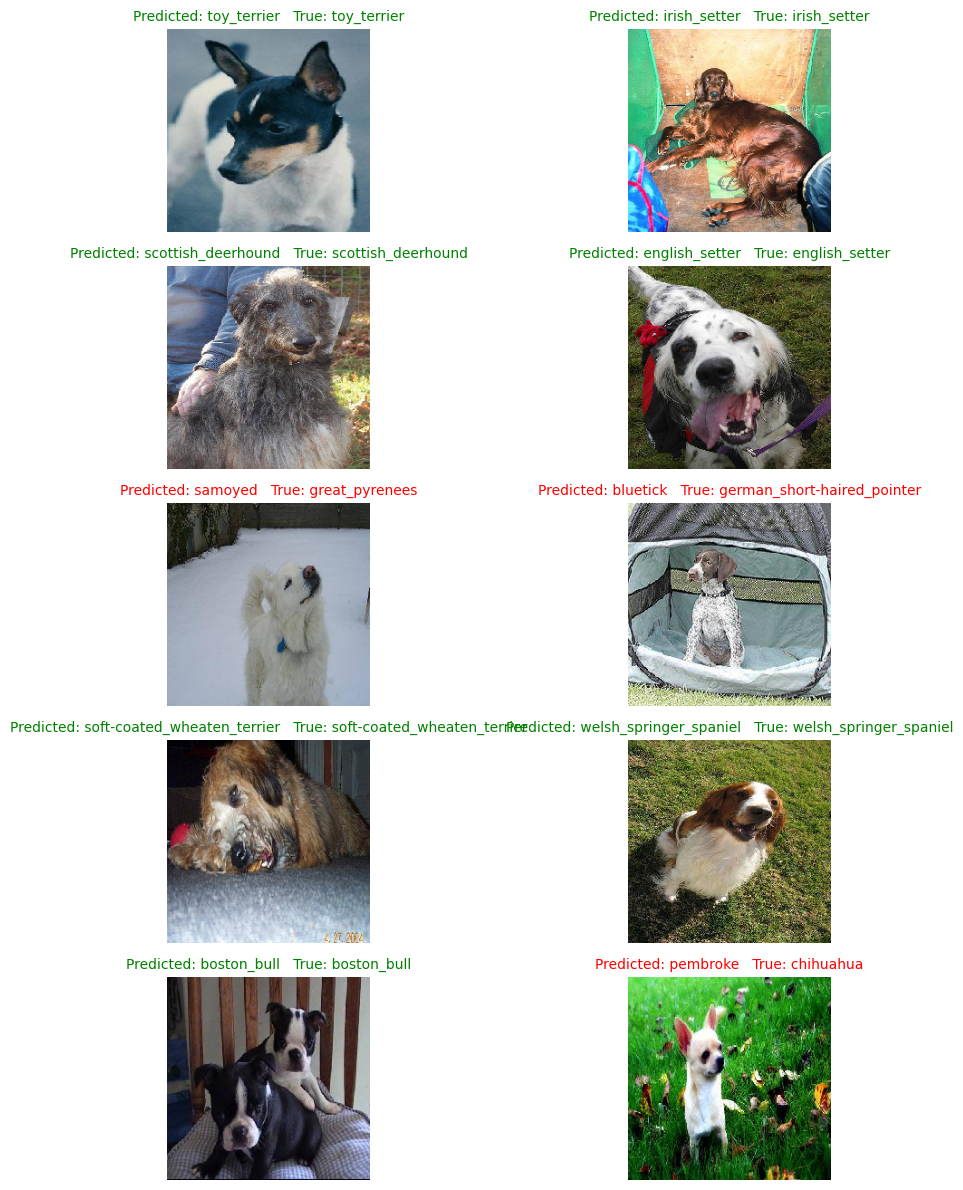

In [ ]:
# Plot it nice with color
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')

    pred_label = CLASS_NAMES[pred_classes[i]]
    true_label = CLASS_NAMES[np.argmax(y_test[i])]

    # colored title
    plt.title(
        f"Predicted: {pred_label}   True: {true_label}",
        fontsize=10,
        color="red" if pred_label != true_label else "green"
    )

plt.tight_layout()
plt.show()
